In [72]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from util import read_neighborhoods

In [68]:
df_value_history = pd.read_csv("data/Value History/EXTR_ValueHistory_V.csv", low_memory=False) #https://info.kingcounty.gov/assessor/DataDownload/default.aspx
gdf_neighborhoods = read_neighborhoods("data/Neighborhoods.csv") #https://kirklandactivitymap.connect.socrata.com/?&redirectToSessionStoreKey=1704660151460#!/view-data
gdf_parcel = gpd.read_file("data/King_County_Parcels___parcel_area/parcel_area.shp") #https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::king-county-parcels-parcel-area/explore?
df_value_history["Major"] = df_value_history["Major"].astype(str).str.zfill(6)
df_value_history["Minor"] = df_value_history["Minor"].astype(str).str.zfill(4)
gdf_parcel["MAJOR"] = gdf_parcel["MAJOR"].astype(str).str.zfill(6)
gdf_parcel["MINOR"] = gdf_parcel["MINOR"].astype(str).str.zfill(4)
gdf = gdf_parcel.merge(
    df_value_history[df_value_history["TaxYr"] == 2003],
    left_on=["MAJOR", "MINOR"],
    right_on=["Major", "Minor"],
)
gdf["Val"] = gdf["LandVal"] + gdf["ImpsVal"]
gdf["Land/ImprovementVal"] = (gdf["LandVal"] + 0.01) / (gdf["ImpsVal"] + 0.01)
gdf["Land/ImprovementVal"] = gdf["Land/ImprovementVal"].apply(lambda v: v if v <=2 else 2)
gdf = gpd.sjoin(
    left_df=gdf,
    right_df=gdf_neighborhoods,
    how="inner",
)

Text(0.5, 0, 'Land Value Divided By Improvement Value Capped at 2')

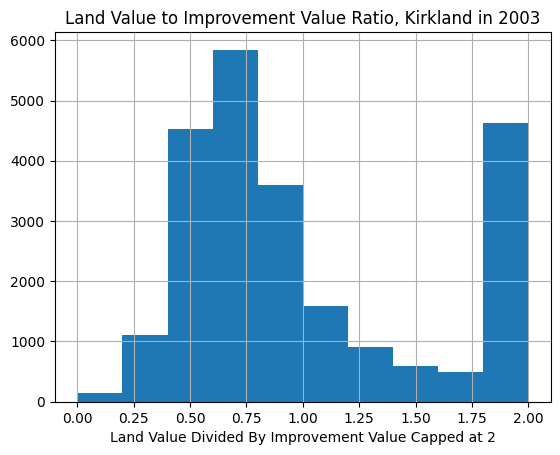

In [73]:
gdf["Land/ImprovementVal"].hist()
plt.title("Land Value to Improvement Value Ratio, Kirkland in 2003")
plt.xlabel("Land Value Divided By Improvement Value Capped at 2")

In [34]:
df_permits = pd.read_csv("data/permit_units - original.csv").drop(["Unnamed: 0"], axis=1) #https://docs.google.com/spreadsheets/d/1CBwfrrgete9Lp-6GmGwHwDmyYf8YCwD_b6P5-gW52Q4/edit?usp=sharing
gdf_neighborhoods = read_neighborhoods("data/Neighborhoods.csv") #https://kirklandactivitymap.connect.socrata.com/?&redirectToSessionStoreKey=1704660151460#!/view-data
df_permits["SiteParcelNumber"] = df_permits["SiteParcelNumber"].astype(str).str.zfill(10)
df_permits["ApplicationYear"] = pd.to_datetime(df_permits["Date_Application"]).dt.year
df_value = pd.read_csv("data/value_history/EXTR_ValueHistory_V.csv") #https://info.kingcounty.gov/assessor/DataDownload/default.aspx
df_value["Minor"] = df_value["Minor"].astype(str).str.zfill(4)
df_value["Major"] = df_value["Major"].astype(str).str.zfill(6)
df_value["SiteParcelNumber"] = df_value["Major"] + df_value["Minor"]
df_value["appr_land_g_imp"] = df_value["ApprLandVal"] > df_value["ApprImpsVal"]

In [35]:
df_permits

,CaseType,CaseNumber,CaseStatus,RelatedCaseNumber,CaseDescription,num_new_homes,CaseWorkClass,ProjectName,ProjectDescription,Date_Application,Date_Issued,Date_Expires,Date_Finaled,Applicant_Owner,SiteAddress,SiteParcelNumber,ApplicationYear
0,Building Multifamily,BLD00-01034,Finaled,NaN,To build a new 2 story clubhouse to existing m...,0.0,New,PRE P*P CASE,NaN,2000-08-25 0:00:00,2001-07-06 0:00:00,2003-08-25 0:00:00,2002-05-23 0:00:00,NaN,4311 LAKE WASHINGTON BLVD NE,1725059099,2000
1,Building Multifamily,BLD01-01244,Finaled,NaN,Replace 14 diffusers and flex duct.,0.0,New,PRE P*P CASE,NaN,2001-09-19 0:00:00,2001-09-19 0:00:00,2004-09-19 0:00:00,2001-09-20 0:00:00,NaN,244 MARKET ST,3885808495,2001
2,Building Multifamily,BLD01-01585,Finaled,NaN,To remove and replace drywall in covered exter...,0.0,New,PRE P*P,NaN,2001-12-06 0:00:00,2001-12-21 0:00:00,2004-12-06 0:00:00,2003-02-07 0:00:00,NaN,9330 NE JUANITA DR,3585270010,2001
3,Building Multifamily,BLD02-00510,Finaled,NaN,"To install a D100L commercial water heater, 19...",0.0,New,KIRKLAND LODGE,NaN,2002-05-09 0:00:00,2002-05-09 0:00:00,2005-05-09 0:00:00,2002-05-22 0:00:00,NaN,6505 LAKEVIEW DR,0825059030,2002
4,Building Multifamily,BLD04-00112,Finaled,NaN,Install fireplace insert with gas piping in Un...,0.0,New,NaN,NaN,2004-02-09 0:00:00,2004-02-09 0:00:00,2007-02-09 0:00:00,2004-02-19 0:00:00,NaN,10323 NE 116TH ST,7941300000,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Building Mixed Use,BMU18-07011,Finaled,NaN,Aegis Kirkland - New Construction of Senior Ho...,NaN,New,Aegis Living - Lake Street South,NaN,2018-10-04 0:00:00,2019-05-29 0:00:00,2022-11-29 0:00:00,2021-04-26 0:00:00,Jeremy Southerland,1002 LAKE ST S,9354900220,2018
327,Building Mixed Use,BMU19-00907,Finaled,NaN,434 KIRKLAND WAY: Construct mixed-use building...,NaN,New,434 KIRKLAND WAY MIXED USE (MRM),NaN,2019-02-07 0:00:00,2019-12-10 0:00:00,2023-06-10 0:00:00,2022-03-21 0:00:00,MBP Contact 2021 v2,430 KIRKLAND WAY,0525059063,2019
328,Building Mixed Use,BMU19-04493,Finaled,NaN,Continental Divide (Mixed-Use Bldg 1) *MASTER ...,NaN,New,Continental Divide Mixed Use (NE 85th),"Ground floor commercial, 3 stories of resident...",2019-06-07 0:00:00,2021-03-26 0:00:00,2024-09-26 0:00:00,2023-02-24 0:00:00,MBP Contact 2022 v2,13120 NE 85TH ST,8635700015,2019
329,Building Mixed Use,BMU20-03586,Finaled,NaN,COK Project New Fire Station 24: Steel framed ...,NaN,New,FIRE STATION #24,Construction of New COK Fire Station to includ...,2020-06-11 0:00:00,2020-08-11 0:00:00,2024-02-11 0:00:00,2022-01-07 0:00:00,Forest Hooker,9824 NE 132ND ST,1926059032,2020


In [36]:
df_merged = df_value.merge(
    df_permits,
    left_on=["SiteParcelNumber", "TaxYr"],
    right_on=["SiteParcelNumber", "ApplicationYear"],
    how="right"
)
df_merged["land_g_imp"] = df_merged["ApprLandVal"] > df_merged["ApprImpsVal"]

In [62]:
df_permits[df_permits["num_new_homes"] != 0]["num_new_homes"].fillna(50).median()

6.0

In [37]:
df_merged[
    (df_merged["num_new_homes"] != 0)
    & (df_merged["ApprLandVal"] > 0)
].sort_values("num_new_homes")[[
    "Date_Application",
    "ProjectName",
    "ProjectDescription",
    "ApprLandVal",
    "ApprImpsVal",
    "LandVal",
    "ImpsVal",
    "num_new_homes",
    "land_g_imp",
]].groupby("land_g_imp").size()

land_g_imp
False    10
True     54
dtype: int64

In [38]:
df_value[df_value["TaxYr"] == 2020].groupby("appr_land_g_imp").size()

appr_land_g_imp
False    595476
True     260111
dtype: int64

In [39]:
df_value

,Major,Minor,TaxYr,OmitYr,ApprLandVal,ApprImpsVal,ApprImpIncr,LandVal,ImpsVal,TaxValReason,TaxStatus,LevyCode,ChangeDate,ChangeDocId,Reason,SplitCode,SiteParcelNumber,appr_land_g_imp
0,214480,0523,2017,0,50000,0,0,50000,0,,T,2106,2016-08-23 00:00:00,B002438,SEGREGATION,0,2144800523,True
1,214480,0523,2016,0,50000,0,0,50000,0,,T,2106,2016-08-23 00:00:00,B002438,SEGREGATION,0,2144800523,True
2,214480,0523,2017,0,54000,0,0,54000,0,,T,2106,2016-09-12 00:00:00,,REVALUE,0,2144800523,True
3,214480,0523,2017,0,126000,0,116000,126000,0,,T,2106,2016-10-04 00:00:00,,MAINTENANCE,0,2144800523,True
4,214480,0523,2018,0,148000,0,0,148000,0,,T,2106,2017-08-01 00:00:00,,REVALUE,0,2144800523,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25702138,185320,0190,2020,0,300000,485000,0,300000,485000,,T,1708,2019-09-04 00:00:00,,REVALUE,0,1853200190,False
25702139,185320,0190,2021,0,306000,470000,0,306000,470000,,T,1708,2020-08-18 00:00:00,,REVALUE,0,1853200190,False
25702140,185320,0190,2022,0,370000,550000,0,370000,550000,,T,1708,2021-08-18 00:00:00,,REVALUE,0,1853200190,False
25702141,185320,0190,2023,0,509000,753000,0,509000,753000,,T,1708,2022-09-26 00:00:00,,REVALUE,0,1853200190,False


In [40]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Kirkland Multifamily and Mixed Use New Construction Permits')

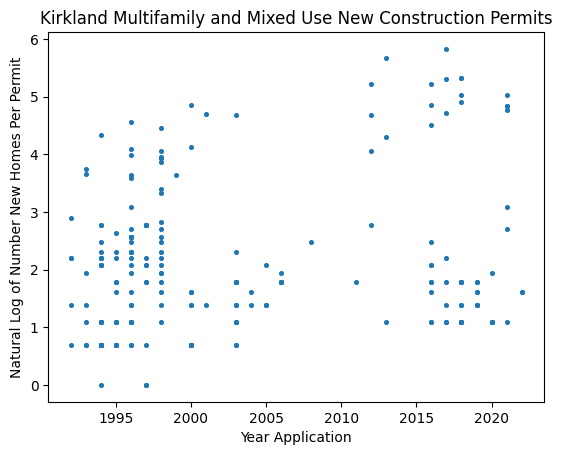

In [41]:
plt.scatter(
    x=df_permits[df_permits["num_new_homes"] != 0]["ApplicationYear"],
    y=np.log(df_permits[df_permits["num_new_homes"] != 0]["num_new_homes"]),
    s=7,
)
plt.xlabel("Year Application")
plt.ylabel("Natural Log of Number New Homes Per Permit")
plt.title("Kirkland Multifamily and Mixed Use New Construction Permits")

Text(0.5, 1.0, 'Kirkland Multifamily and Mixed Use New Construction Permits')

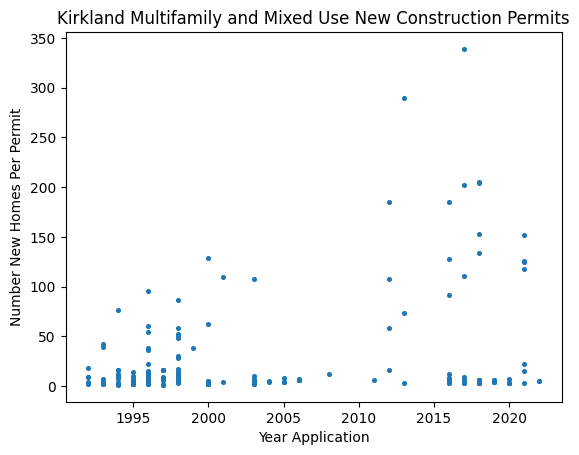

In [42]:
plt.scatter(
    x=df_permits[df_permits["num_new_homes"] != 0]["ApplicationYear"],
    y=df_permits[df_permits["num_new_homes"] != 0]["num_new_homes"],
    s=7,
)
plt.xlabel("Year Application")
plt.ylabel("Number New Homes Per Permit")
plt.title("Kirkland Multifamily and Mixed Use New Construction Permits")

Text(0.5, 1.0, 'Kirkland Number of New Homes Applied for in Multifamily or Mixed Use')

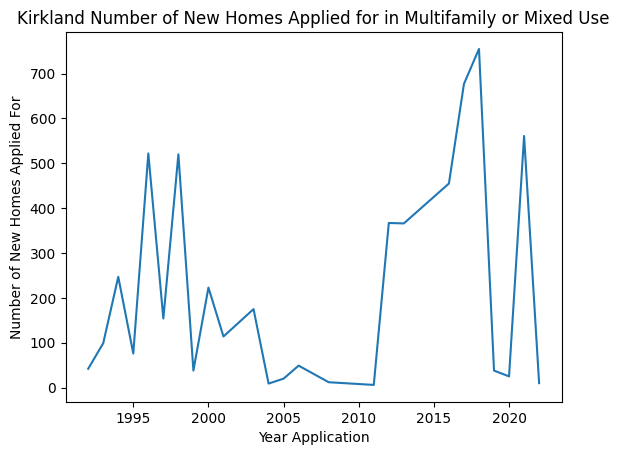

In [48]:
df_total_new_homes = df_permits[df_permits["num_new_homes"] != 0].groupby("ApplicationYear").sum(numeric_only=True)
plt.plot(
    df_total_new_homes.index,
    df_total_new_homes["num_new_homes"],
)
plt.xlabel("Year Application")
plt.ylabel("Number of New Homes Applied For")
plt.title("Kirkland Number of New Homes Applied for in Multifamily or Mixed Use")

Text(0.5, 1.0, 'Kirkland Number of New Applications for Multifamily or Mixed Use')

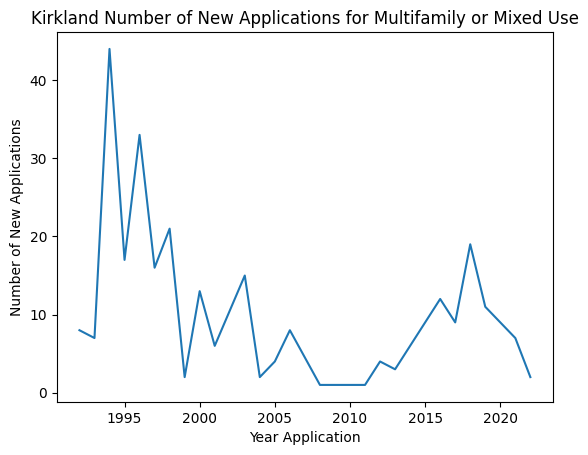

In [55]:
df_total_applications = df_permits[df_permits["num_new_homes"] != 0].groupby("ApplicationYear").size().reset_index().rename({0: "num_applications"}, axis=1)
plt.plot(
    df_total_applications["ApplicationYear"],
    df_total_applications["num_applications"],
)
plt.xlabel("Year Application")
plt.ylabel("Number of New Applications")
plt.title("Kirkland Number of New Applications for Multifamily or Mixed Use")